## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Exploratory Data Analysis
2.	Multiple regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data (it is the same as for the previous assignment) and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and an html file of your work. 

Good luck!


**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [46]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels

%matplotlib inline

In [47]:
#Read in data
df2 =pd.read_csv('/content/sample_data/auto_imp (1).csv')

In [48]:
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,gas,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
191,gas,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
192,gas,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
193,diesel,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


## 1. Data 

### Get dummy variables for fuel_type

In [49]:
df2=pd.get_dummies(df2, columns=['fuel_type'],drop_first=True)


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    int64  
 10  peak_rpm       195 non-null    int64  
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(7), int64(7), uint8(1)
memory usage: 21.6 KB


In [51]:
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450,1


## 1.2 EDA

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


### **1. Providing descriptions of the Sample and Features**

In [52]:
## Your EDA should start here
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,0.897436
std,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.304170
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,1.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,1.000000
75%,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,1.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000


### **2. Checking for Missing Data**

In [53]:
df2.isnull().sum()

wheel_base       0
length           0
width            0
heights          0
curb_weight      0
engine_size      0
bore             0
stroke           0
comprassion      0
horse_power      0
peak_rpm         0
city_mpg         0
highway_mpg      0
price            0
fuel_type_gas    0
dtype: int64

### **3. Identifying the shape of the data**

In [54]:
df2.shape

(195, 15)

In [55]:
df2.columns

Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'fuel_type_gas'],
      dtype='object')

### **Visualizations**

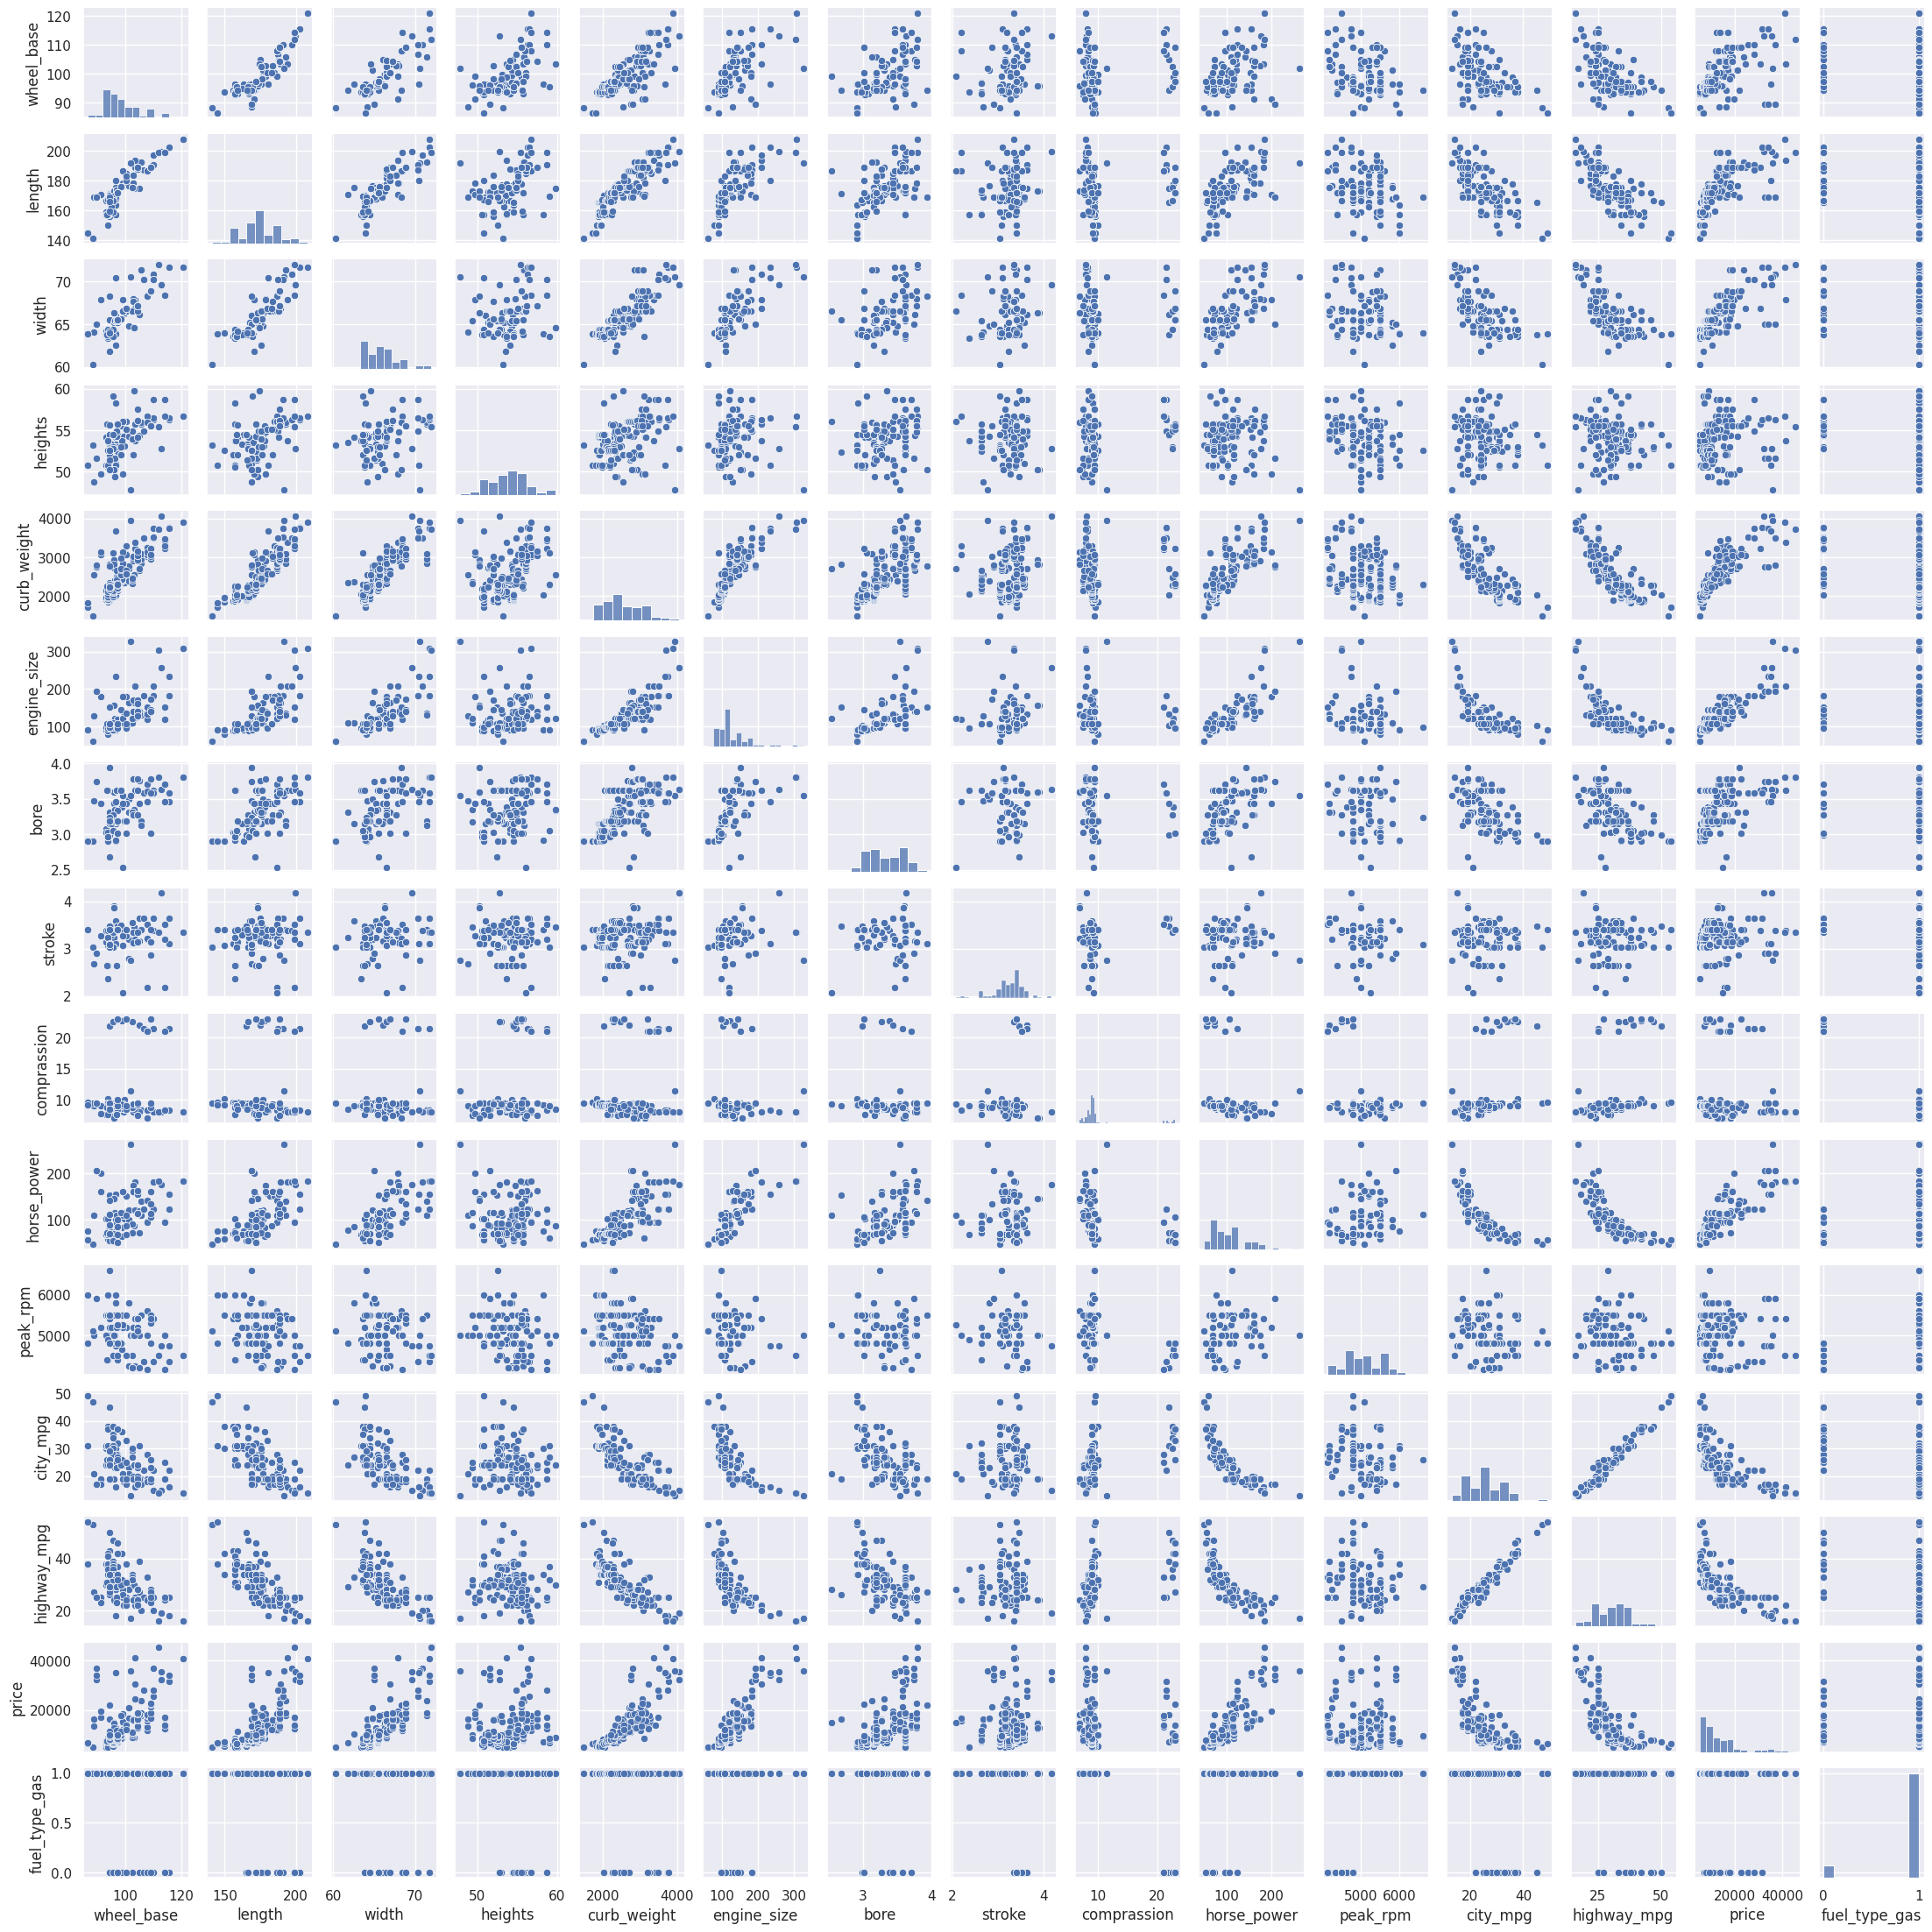

In [56]:
sns.pairplot(data=df2, height=1.5)


The approach above is used to pairwise display each numerical variable in the car imports dataset. The plot's height is defined by the height parameter, which is given in inches. As a result, a grid of scatter plots is produced, each of which displays a diagonal histogram of the distribution of each variable. The scatter plots display how each pair of variables is related to the other.



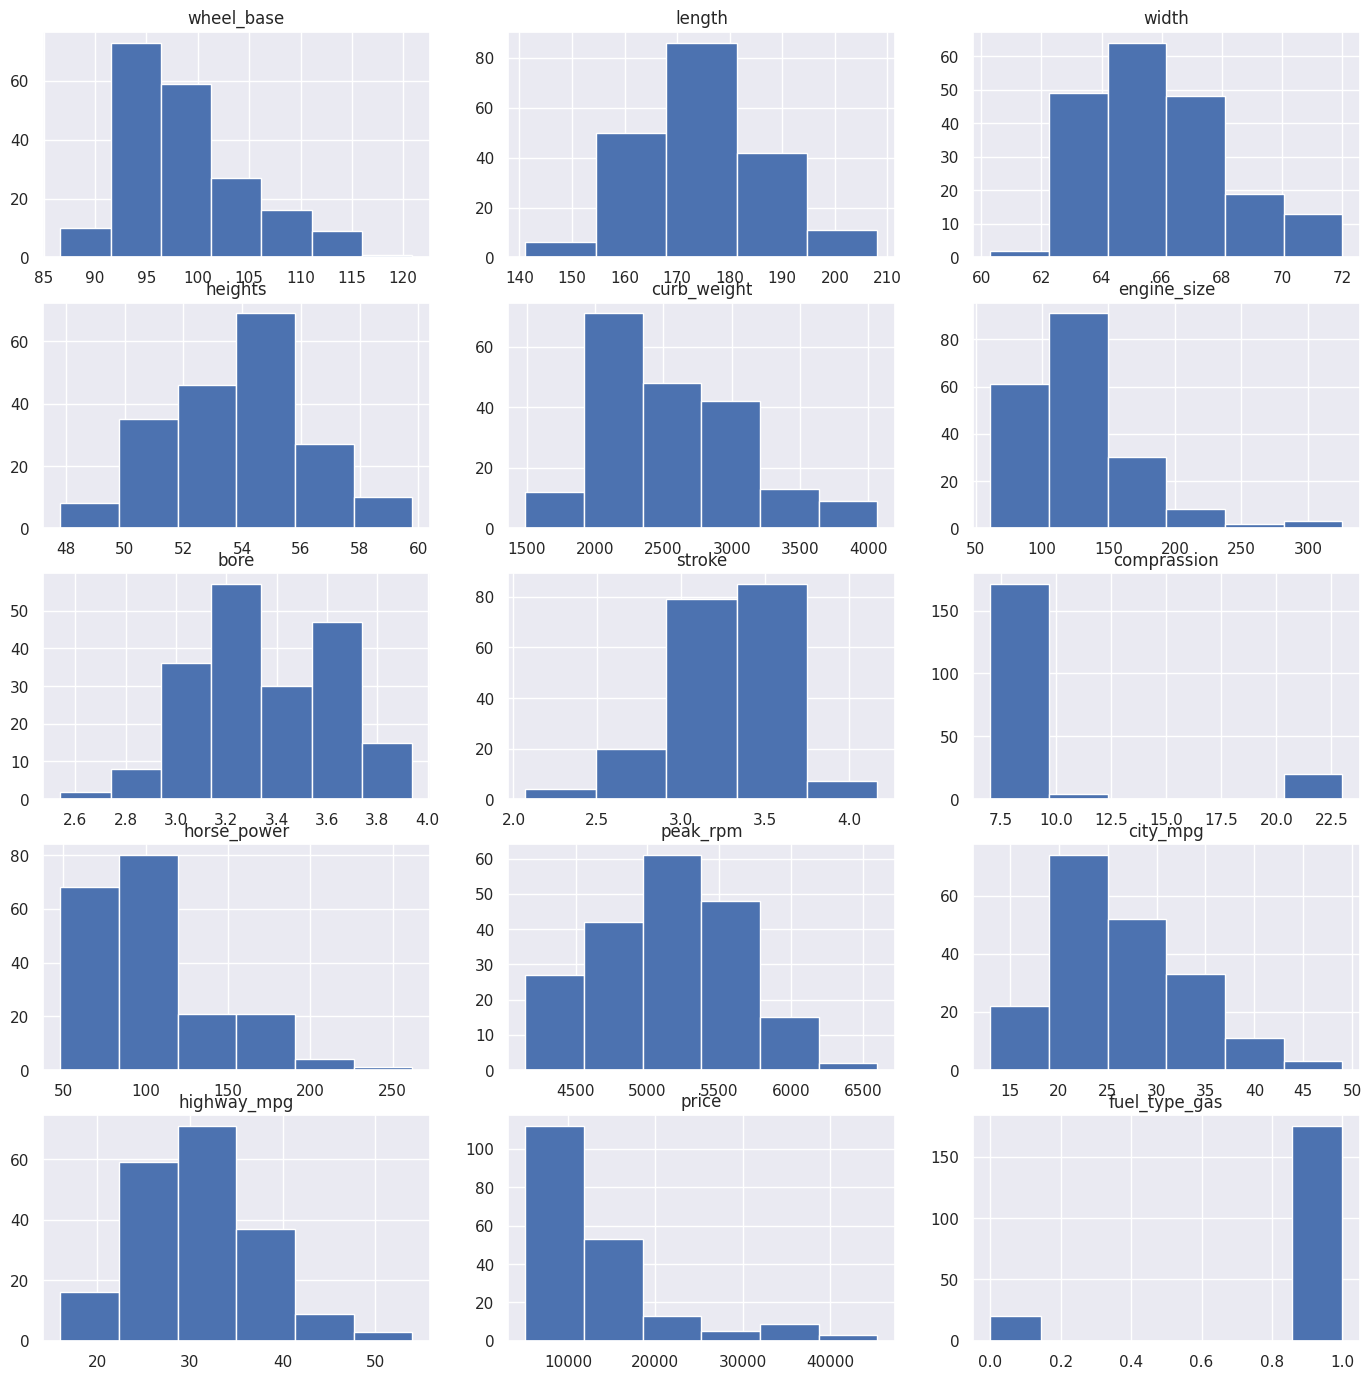

In [57]:
fig,axes = plt.subplots(5,3, figsize = (17,17))
axes[0,0].set_title("wheel_base")
axes[0,0].hist(df2['wheel_base'], bins = 7)
 
axes[0,1].set_title("length")
axes[0,1].hist(df2['length'], bins=5);
 
axes[0,2].set_title("width")
axes[0,2].hist(df2['width'], bins=6);
 
axes[1,0].set_title("heights")
axes[1,0].hist(df2['heights'], bins=6);

axes[1,1].set_title("curb_weight")
axes[1,1].hist(df2['curb_weight'], bins=6);

axes[1,2].set_title('engine_size')
axes[1,2].hist(df2['engine_size'], bins=6)

axes[2,0].set_title("bore")
axes[2,0].hist(df2['bore'], bins = 7)
 
axes[2,1].set_title("stroke")
axes[2,1].hist(df2['stroke'], bins=5);
 
axes[2,2].set_title("comprassion")
axes[2,2].hist(df2['comprassion'], bins=6);
 
axes[3,0].set_title("horse_power")
axes[3,0].hist(df2['horse_power'], bins=6);

axes[3,1].set_title("peak_rpm")
axes[3,1].hist(df2['peak_rpm'], bins=6);

axes[3,2].set_title('city_mpg')
axes[3,2].hist(df2['city_mpg'], bins=6)

axes[4,0].set_title("highway_mpg")
axes[4,0].hist(df2['highway_mpg'], bins = 6)
 
axes[4,1].set_title("price")
axes[4,1].hist(df2['price'], bins=6);
 
axes[4,2].set_title("fuel_type_gas")
axes[4,2].hist(df2['fuel_type_gas'], bins=7);
 


The x-axis of each histogram shows the range of values for that specific feature, while the y-axis shows how frequently each range of values occurs. For instance, the "length" variable's histogram reveals that the majority of the cars in the dataset are between 160 and 180 inches long, while the "fuel_type_gas" variable's histogram reveals that virtually all of the vehicles in the dataset are powered by gasoline.


### **4. Identifying Significant Correlations**

In [58]:
df2.corr(method = 'pearson')

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
wheel_base,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793,-0.303643
length,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331,-0.210618
width,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273,-0.245375
heights,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291,-0.279070
curb_weight,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729,-0.219488
engine_size,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942,-0.063490
bore,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873,-0.056245
stroke,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746,-0.253774
comprassion,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500,-0.985398
horse_power,0.375541,0.583813,0.616779,-0.084412,0.760285,0.842691,0.568527,0.100040,-0.214401,1.000000,0.105654,-0.834117,-0.812917,0.811027,0.168454


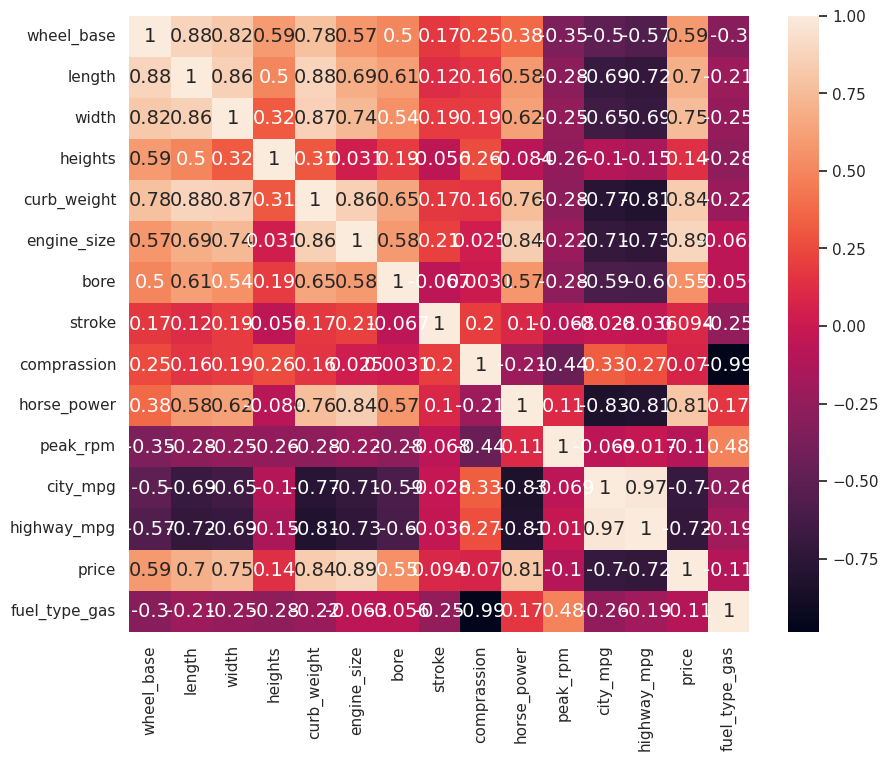

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(method='pearson'), annot=True)
plt.show()

Engine size and price show a strong positive association in the vehicle imports dataset, which suggests that more expensive engines often have bigger engines. The strong positive association between the horsepower and price columns demonstrates that more powerful cars are frequently more expensive. On the other hand, there is an inverse correlation between the city-mpg and highway-mpg columns, showing that vehicles with higher city fuel economy frequently have lower highway fuel efficiency.


## 2. Multiple Regression Analysis

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [60]:
##Your code goes here
y = df2['price']
X = df2.drop('price', axis=1)
X = sm.add_constant(X) #constant created to the independent variables
model1 = sm.OLS(y, X).fit()
model1


The y variable represents the response or dependent variable, and the x variable represents the predictor or independent variables, in the Python code above, which does a standard multiple linear regression analysis. Regression modeling is used to determine the linear relationship between the dependent and independent variables, with the constant serving as the intercept of the regression line.


In [61]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     78.89
Date:                Mon, 01 May 2023   Prob (F-statistic):           5.84e-69
Time:                        03:03:47   Log-Likelihood:                -1838.5
No. Observations:                 195   AIC:                             3707.
Df Residuals:                     180   BIC:                             3756.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -4.45e+04   1.84e+04     -2.419      0.017   -8.08e+04   -8194.301
wheel_base       39.5305    103.549      0.382      0.703    -164.796     243.857
length          -60.6333     58.500     -1.036      0.301    -176.068      54.801
width           603.6414    254.539      2.372      0.019     101.377    1105.906
heights         329.5669    140.947      2.338      0.020      51.446     607.688
curb_weight       1.1798      1.738      0.679      0.498      -2.249       4.609
engine_size     138.4537     16.111      8.594      0.000     106.662     170.245
bore          -1208.4137   1206.683     -1.001      0.318   -3589.479    1172.651
stroke        -3706.0531    874.513     -4.238      0.000   -5431.669   -1980.437
comprassion    -617.1497    446.452     -1.382      0.169   -1498.103     263.804
horse_power      34.6328     18.049      1.919      0.057      -0.982      70.248
peak_rpm          2.5517      0.709      3.599      0.000       1.153       3.951
city_mpg       -288.2868    180.791     -1.595      0.113    -645.030      68.456
highway_mpg     316.6334    163.540      1.936      0.054      -6.069     639.336
fuel_type_gas -1.173e+04   6002.268     -1.955      0.052   -2.36e+04     110.854
==============================================================================
Omnibus:                       18.136   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.211
Skew:                           0.240   Prob(JB):                     1.03e-12
Kurtosis:                       5.562   Cond. No.                     4.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The dependent variable's variation is accounted for by the independent variables to a degree of around 86% according to the model's R-squared value of 0.860.The new R-squared value is 0.849.The model is statistically significant, as shown by the F-statistic of 78.89, which has a probability of 5.84e-69.

The coefficients for each independent variable are also included in the result. When all other independent variables are held constant, the coefficient estimates show the change in the dependent variable for a one-unit change in the related independent variable. The p-values, t-statistics, and standard errors are also displayed.


In [62]:
#variance of the model
model1.mse_resid

9802534.782392945

In [63]:
#95% confidence interval
model1.conf_int(alpha=0.05, cols=None)

,0,1
const,-80804.687242,-8194.301393
wheel_base,-164.796403,243.857427
length,-176.067817,54.801253
width,101.376931,1105.905788
heights,51.445805,607.688013
curb_weight,-2.248863,4.608553
engine_size,106.662153,170.245178
bore,-3589.478552,1172.651235
stroke,-5431.669228,-1980.436936
comprassion,-1498.103020,263.803582


In [64]:
# 99% confidence interval
model1.conf_int(alpha=0.01, cols=None)

,0,1
const,-92399.415577,3400.426942
wheel_base,-230.051946,309.112970
length,-212.933950,91.667387
width,-59.030413,1266.313132
heights,-37.377264,696.511082
curb_weight,-3.343883,5.703574
engine_size,96.508951,180.398379
bore,-4349.915238,1933.087921
stroke,-5982.776351,-1429.329813
comprassion,-1779.451593,545.152154


### Answer the questions based on the output

1. How do you interpret the intercept?


2. How many variables are statistically significant?


3. What is the variance of the model?


4. What is the coefficeint of determination and how do you interpret it?


5. What is the F-statistics used for? How do you interpret it for this model?

1) The value of the dependent variable (price) when all the independent variables (predictors) are zero is known as the intercept, which is shown by the "const" word. The projected average automobile price is negative when all the independent variables are zero since the intercept at that time has a value of -4.45e+04. In order to provide a more insightful evaluation of the intercept, it is crucial to take into account the context of the data and the range of values of the predictors because this is not a valid interpretation.

2) There is statistical significance for the variables const, width, heights, engine_size, stroke, and peak_rpm. Six factors are thus statistically significant at the 5% level.

3) The OLS Regression Results output include the model variance, commonly known as the mean squared error (MSE), as mse_resid. The value of mse_resid in this instance is 9802534.782392945.

4) The coefficient of determination, also known as R-squared (R2), is a statistical measure that demonstrates the extent to which the independent variables (wheel base, length, width, heights, curb weight, engine size, bore, stroke, compression, horsepower, peak rpm, city mpg, highway mpg, fuel type gas) can explain the variance in the dependent variable (price) in a linear regression model. The model's variables can explain around 86% of the variation in car costs, according to the R-squared value in this case, which is 0.860. This demonstrates both how well the model fits the data and how significantly the independent variables selected affect the dependent variable. 
But it's important to remember that the model might not take into account all conceivable factors.The effectiveness of the model can also be further assessed by looking at additional statistical indicators like the F-statistic, t-values, and p-values.

5) The overall significance of the regression model is evaluated using the F-statistic. The F-statistic is 78.89 and the extremely low p-value is 5.84e-69, indicating that the model as a whole is significant and can explain a considerable percentage of the variation in the dependent variable in this situation. The null hypothesis that all regression coefficients are equal to zero can be used to interpret the F-statistic, which shows that there is no association between the independent factors and the dependent variable.
The alternative theory is that there is a relationship between the independent factors and the dependent variable if at least one regression coefficient is not equal to zero. We reject the null hypothesis and accept the alternative one since the F-statistic in this model is high and the p-value is very little. This demonstrates a connection between the independent and dependent variables and demonstrates that the model's ability to predict the dependent variable as a whole is successful.




**2. Dropp all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow. 

In [65]:
## your code starts here
drop_not_significant= []
for i in range(len(model1.pvalues)):
    if model1.pvalues[i] > 0.1:
        drop_not_significant.append(model1.params.index[i])
df3 = df2.drop(drop_not_significant, axis=1)
df3

,width,heights,engine_size,stroke,horse_power,peak_rpm,highway_mpg,price,fuel_type_gas
0,64.1,48.8,130,2.68,111,5000,27,13495,1
1,64.1,48.8,130,2.68,111,5000,27,16500,1
2,65.5,52.4,152,3.47,154,5000,26,16500,1
3,66.2,54.3,109,3.40,102,5500,30,13950,1
4,66.4,54.3,136,3.40,115,5500,22,17450,1
...,...,...,...,...,...,...,...,...,...
190,68.9,55.5,141,3.15,114,5400,28,16845,1
191,68.8,55.5,141,3.15,160,5300,25,19045,1
192,68.9,55.5,173,2.87,134,5500,23,21485,1
193,68.9,55.5,145,3.40,106,4800,27,22470,0


In [66]:
#Running another regression model(model 2) with price as the dependent variable and the rest of the variables as the independent variables
X2 = df3.drop('price', axis=1)
y2 = df3['price']
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()
model2

In [67]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     136.5
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.29e-73
Time:                        03:03:47   Log-Likelihood:                -1842.2
No. Observations:                 195   AIC:                             3702.
Df Residuals:                     186   BIC:                             3732.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.156e+04   1.49e+04     -4.138      0.000   -9.09e+04   -3.22e+04
width           566.4440    196.395      2.884      0.004     178.995     953.893
heights         289.5923    113.100      2.561      0.011      66.470     512.715
engine_size     131.2899     13.724      9.566      0.000     104.215     158.365
stroke        -2942.0083    775.472     -3.794      0.000   -4471.859   -1412.158
horse_power      43.1639     15.720      2.746      0.007      12.152      74.176
peak_rpm          2.3532      0.639      3.683      0.000       1.093       3.614
highway_mpg      39.9588     69.437      0.575      0.566     -97.027     176.944
fuel_type_gas -3384.0156    998.300     -3.390      0.001   -5353.463   -1414.568
==============================================================================
Omnibus:                       18.233   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.116
Skew:                           0.177   Prob(JB):                     5.36e-14
Kurtosis:                       5.720   Cond. No.                     3.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Answer the questions based on the output


1. How do you interpret the intercept? 


2. How many variables are statistically significant? 


3. What is the variance of the model? 


4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value. 


5. What is the F-statistics used for? How do you interpret it for this model?

1) The intercept in this model (const) indicates the predicted mean value of the dependent variable (price) when all of the independent variables are equal to zero. It is the estimated cost for a car with zero width, zero height, zero engine size, zero stroke, zero horsepower, and zero highway mpg, in other words, regardless of the fuel type. The intercept should be treated with caution, though, as this is not a plausible or relevant circumstance. Understanding the coefficients of the major independent variables should take precedence over the intercept because the latter may not have a useful interpretation in practice.

2) The second regression model (model2) has eight independent variables with a p-value of 0.1, all of which are statistically significant at least at a 90% level.

3) It is possible to calculate the variance of the model using the mean squared error (MSE) of the residuals, which is provided by the mse_resid attribute of the model2 object. The variance of the model is approximately 9,852,556.11.

4) The percentage of the variance in the dependent variable (price) that can be explained by the independent variables (width, heights, engine_size, stroke, horse_power, peak_rpm, highway_mpg, and fuel_type_gas) is known as the coefficient of determination (R-squared) in statistics. With an R-squared score of 0.854, the independent variables in Model 2 are able to account for about 85.4% of the price variation. The adjusted R-squared is computed while taking into consideration the number of independent variables in the model. The adjusted R-squared value for model 2 is 0.848, which is just slightly less than the R-squared value for model 1 (0.866). This shows that model 1 may have somewhat overfit the data by adding a few extra independent variables. 
Model 2 seems to be the more effective model overall due to its lower number of independent variables and higher adjusted R-squared value.

5) The overall significance of the regression model is measured by the F-statistic. If all of the regression coefficients in the model are equal to zero, it tests the null hypothesis that the independent variables are ineffective predictors of the dependent variable. When the F-statistic is high and the accompanying p-value is little (often less than 0.05), we reject the null hypothesis and decide that the regression model is statistically significant. The F-statistic for this model is 136.5, and the very low p-value for it is 1.29e-73. By excluding the null hypothesis that all of the regression coefficients are equal to zero, we can conclude that the regression model is very significant. 
As a result, we can draw the conclusion that the independent factors are reliable predictors of the price dependent variable.



**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

H0: The reduced model is better

Ha: The multiple regression model is better

OR

H0: all the additional variable coefficients are equal to 0

Ha: some of the coefficients are not zero and have explanatory power

In [68]:
##your code goes here
anova_lm(model2,model1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,186.0,1.832575e+09,0.0,NaN,NaN,NaN
1,180.0,1.764456e+09,6.0,6.811918e+07,1.15819,0.3308


The multiple regression model (model2) is superior to the reduced model (model1), which is the alternative hypothesis and the null hypothesis. The ANOVA test, which analyzes the sum of squared residuals (SSR) across the two models, computes the F-statistic and p-value. The F-statistic is 1.15819, and the p-value is 0.3308. Given that the p-value is greater than the significance threshold of 0.05, we are unable to reject the null hypothesis. This shows that the simplified model (model1) is not significantly worse than the multiple regression model (model2) in explaining the data variability. 
As a result, we can conclude that model 1 (the simplified model) more closely matches the data or that there is insufficient evidence to back up the importance of the other variables in model 2.


<Axes: xlabel='wheel_base', ylabel='price'>

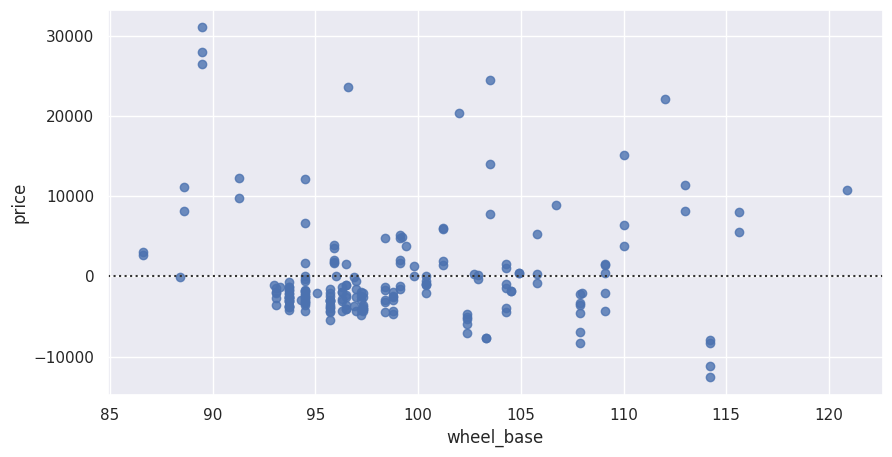

In [69]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.residplot(y = 'price',x = 'wheel_base', data = df2)

<Axes: xlabel='horse_power', ylabel='price'>

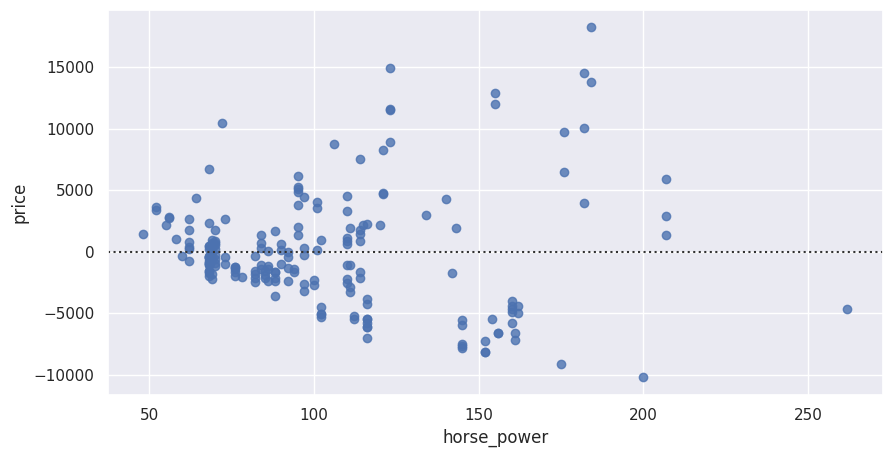

In [70]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.residplot(y = 'price',x = 'horse_power', data = df2)

<Axes: xlabel='engine_size', ylabel='price'>

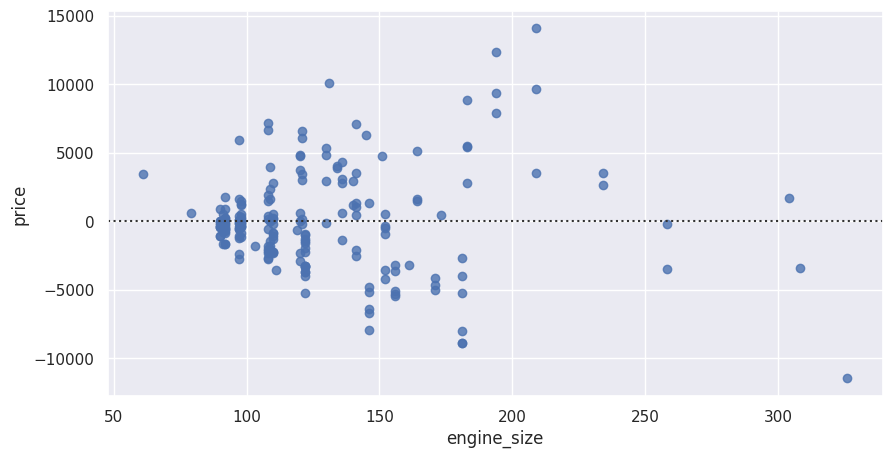

In [71]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.residplot(y = 'price',x = 'engine_size', data = df2)

<Axes: xlabel='bore', ylabel='price'>

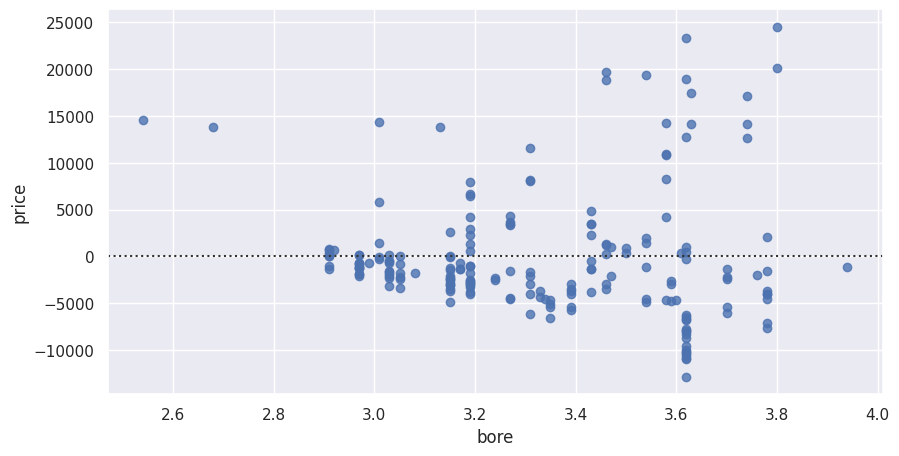

In [72]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.residplot(y = 'price',x = 'bore', data = df2)

<Axes: xlabel='comprassion', ylabel='price'>

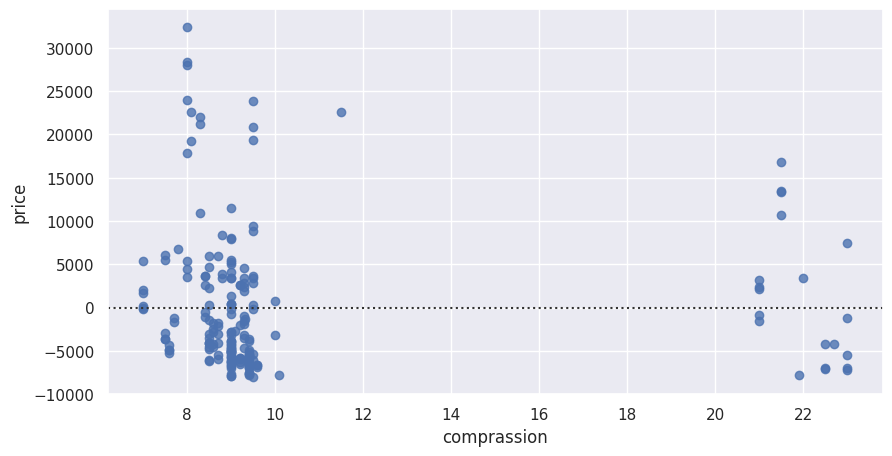

In [73]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.residplot(y = 'price',x = 'comprassion', data = df2)

<Axes: xlabel='highway_mpg', ylabel='price'>

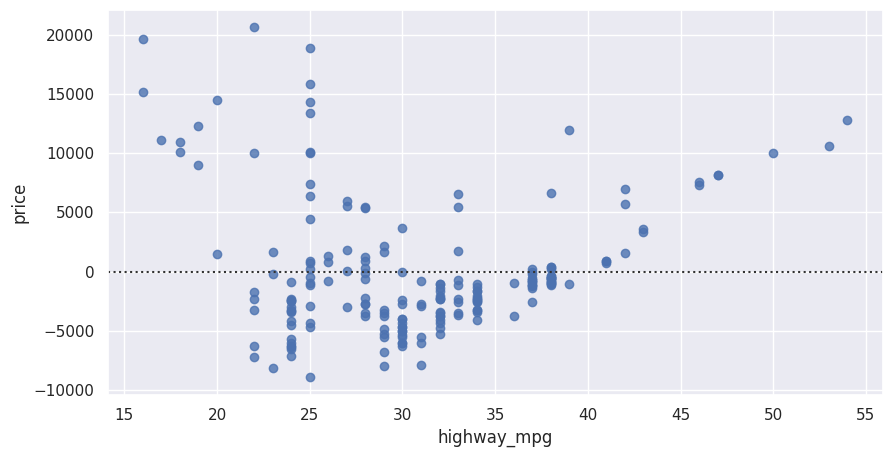

In [74]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.residplot(y = 'price',x = 'highway_mpg', data = df2)

As a result of the above, each independent variable in the dataset and the target variable "price" are plotted in a series of residual plots. Through residual plots, a graphical method for evaluating the goodness of fit of a regression model, the residuals, or discrepancies between the predicted values and the actual values, are examined. The correlation between the residuals and the corresponding independent variable is depicted in each graph. If the figure doesn't show any obvious patterns or trends, the linear regression assumptions are definitely accurate and the model reasonably fits the data.The model may not accurately reflect the data, however, and there may be problems with the assumptions of linear regression, such as nonlinearity, heteroscedasticity, or outliers, if the plot shows a recognizable pattern or trend.
The plots show that certain independent factors seem to have a significant linear link with the target variable while others seem to have no association at all. The residual plot for "horse_power," for example, exhibits a pronounced curved pattern, which suggests that the linear relationship between "horse_power" and "price" may not be appropriate.The residual plot for "curb_weight," however, has a more chaotic pattern and no obvious trend, suggesting that the linear relationship between "curb_weight" and "price" is acceptable.In general, these graphs can be useful in identifying potential issues with the linear regression model and in aiding in the selection of appropriate independent variables for the model.




***4. Checking the assumptions on the model you chose based on ANOVA:***

-What are the assumptions?


-Do they hold? How do you test/check?


### Check for normality

In [75]:
##Normality test
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
statsmodels.stats.stattools.durbin_watson(model1.resid)

0.9784765574137814

The residuals' autocorrelation is determined using the Durbin-Watson test statistic. The range of this statistic is 0 to 4, and a value of 2 denotes the absence of autocorrelation.

In this case, model 1's Durbin-Watson statistic is 0.9784765574137814, which is fairly near to 2. This demonstrates that the model's normality assumption is true and that the residuals have little to no autocorrelation.


In [76]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model1.resid)
lzip(name, test)

[('Jarque-Bera', 55.21077700280737),
 ('Chi^2 two-tail prob.', 1.025963954971646e-12),
 ('Skew', 0.24046525207000358),
 ('Kurtosis', 5.562006714350943)]

The output indicates that the Jarque-Bera test statistic is 55.21, and the exceptionally low Chi2 two-tail probability (1.03e-12) provides strong evidence that the null hypothesis of the normality of the residuals is incorrect. Additionally, the skewness is 0.24, indicating a distribution that is nearly symmetric, and the kurtosis is 5.56, indicating a heavier tail than the normal distribution. As a result, the normalcy presumption has been broken

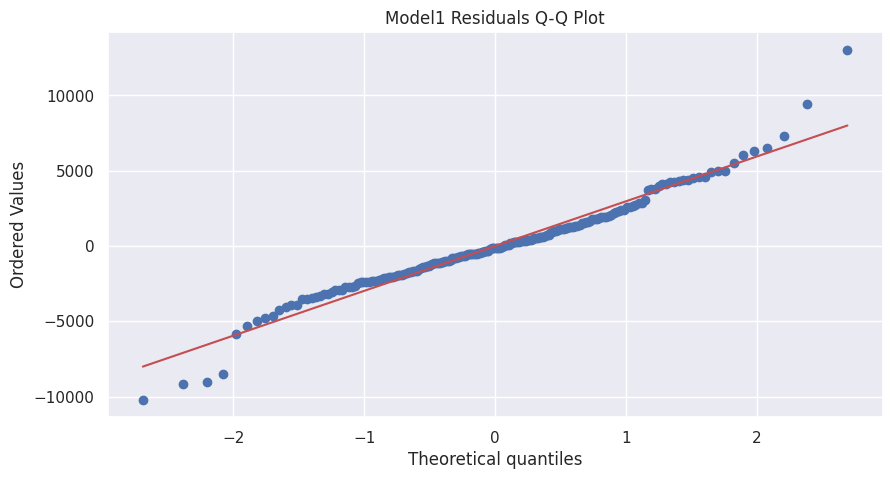

In [77]:
#Q-Q Plot for testing Normality
stats.probplot(model1.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

#Saving plot as a png
plt.savefig("Model1_Resid_qqplot.png")

### Check for constant variance

In [78]:
#Constant variance test
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model1.resid, model1.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 77.88393057396982),
 ('p-value', 6.971426693124656e-11),
 ('f-value', 8.550191502949835),
 ('f p-value', 4.925064760404709e-14)]

The findings of the het_breuschpagan test disprove the null hypothesis of homoscedasticity by demonstrating the presence of heteroscedasticity in the residuals at a significance level of 0.05.


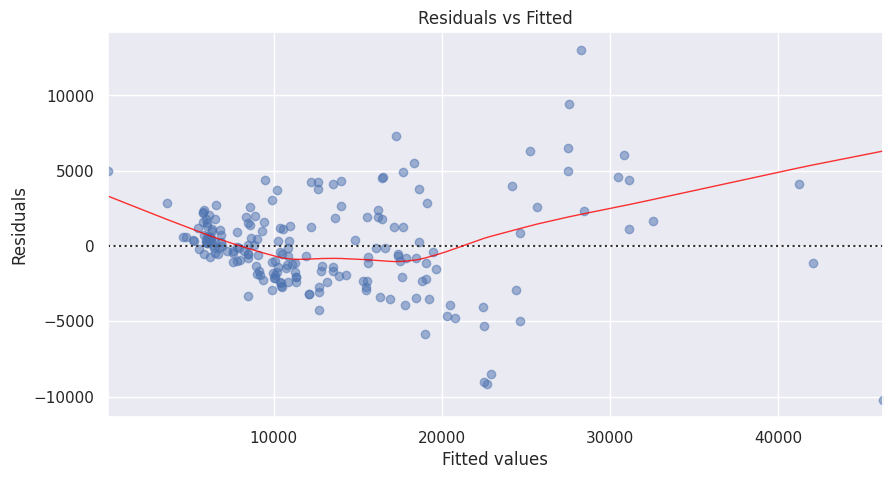

In [79]:
# fitted values
model_fitted_y = model1.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='price', data=df2, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

In this case, the figure looks to show some heteroscedasticity (variance that is not constant) in the residuals. Because the variance of the residuals is not constant across all fitted values, this shows that one of the assumptions of linear regression is incorrect. The heteroscedasticity result of the Breusch-Pagan test, which showed rejection of the null hypothesis of constant variance with a small p-value, supports this further.


### Plots to check linearity assumption:

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/regressionplots.py:565: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()
<ipython-input-80-83cb37f6bf35>:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(pad=1.5)


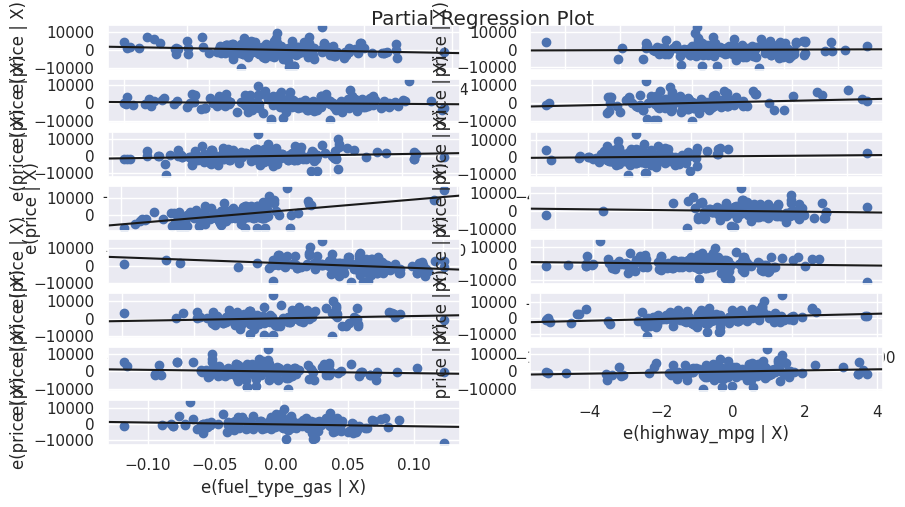

In [80]:
fig = sm.graphics.plot_partregress_grid(model1)
fig.tight_layout(pad=1.5)

This partial regression graph depicts the relationship between the dependent variable and an independent variable after taking into consideration the other independent variables. The graph should show a linear relationship between the two variables

eval_env: 1


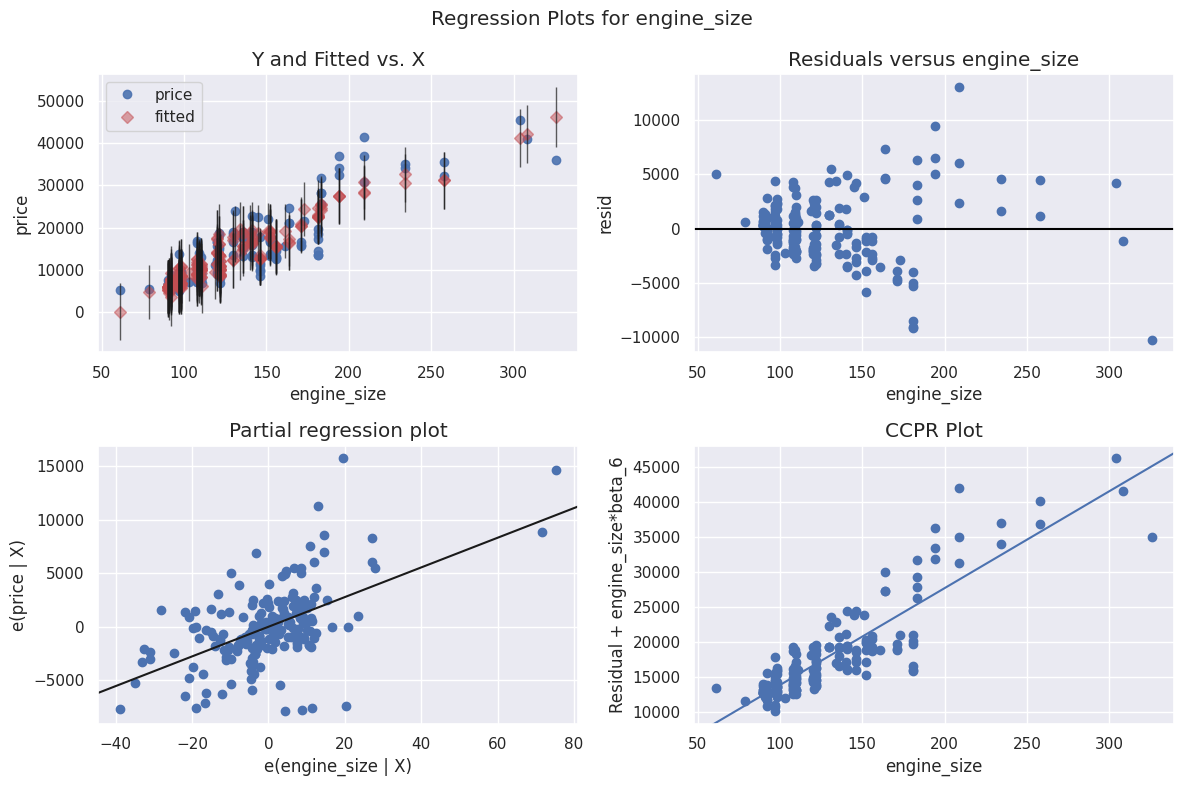

In [81]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model1, 'engine_size', fig=fig)
plt.show()

eval_env: 1


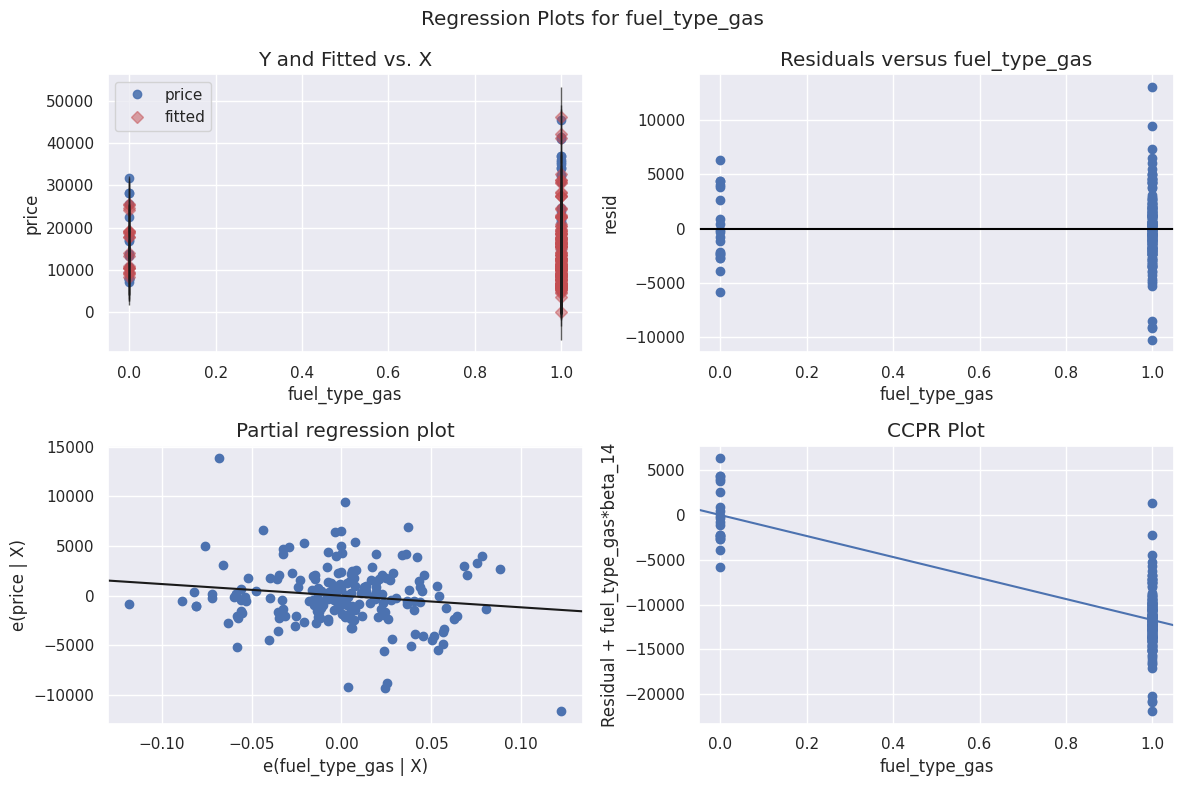

In [82]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model1, 'fuel_type_gas', fig=fig)
plt.show()

This programme generates many diagnostic graphs and regression plots for the independent variables and the dependent variable (price).

The top left corner of the previously stated plots shows the dependent variable (price) and regression line in relation to the independent factors. The residuals are plotted as a Q-Q diagram in the upper right plot to help you decide whether or not they are normal. For the bottom left plot's linearity check, the residuals are displayed in respect to the independent variable. With additional model components taken into account, the partial regression image in the lower right shows the relationship between the independent variable and the dependent variable (price).


### **Influential Points**

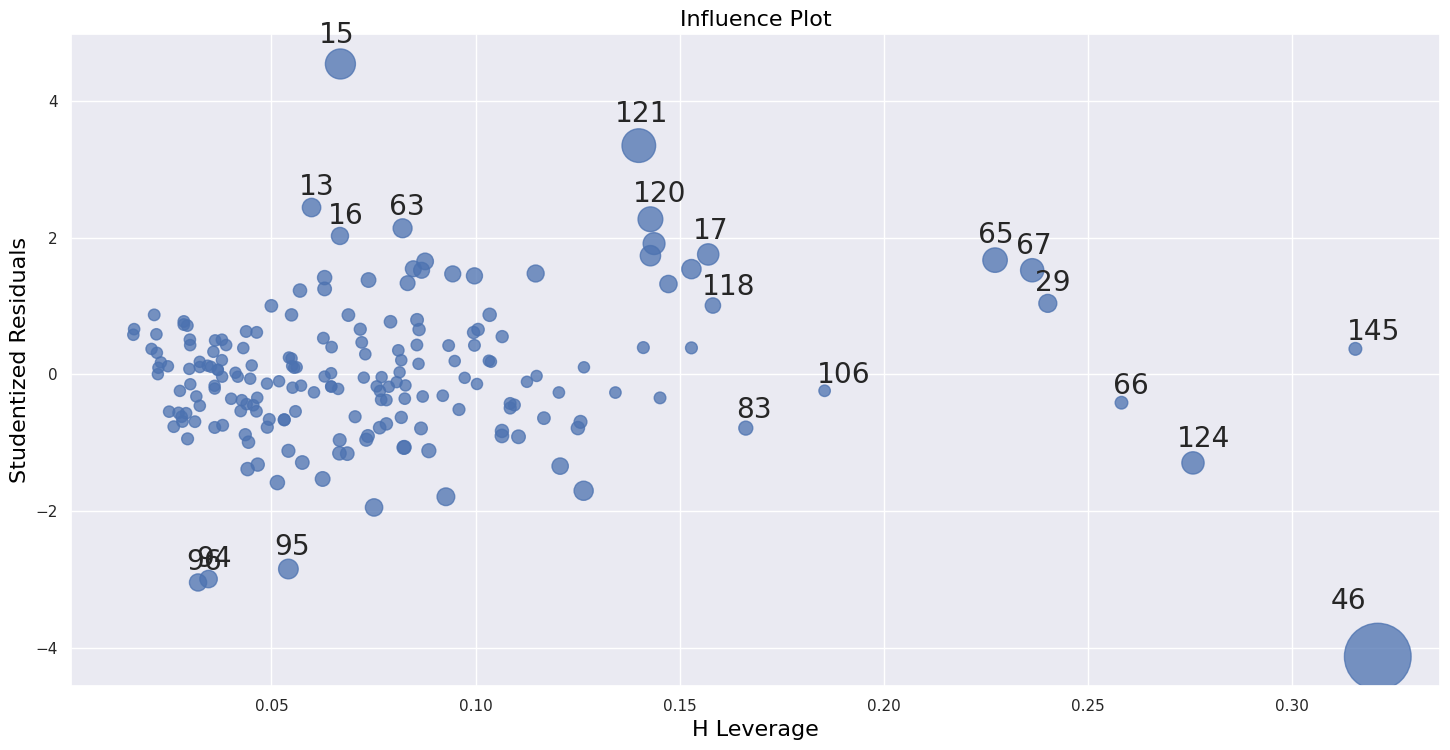

In [83]:
plt.rc("figure", figsize=(15, 8))
plt.rc("font", size=14)
fig = sm.graphics.influence_plot(model1, criterion="cooks")
fig.tight_layout(pad=1.8)

The influence plot shows the values of Cook's distance for each observation in the dataset. How the expected regression coefficients would vary if a specific observation were omitted depends on the Cook's distance. The data's large values of Cook's distance have a more noticeable effect on the regression model.

Each point in the diagram represents one observation, and the Cook's distance value is displayed on the y-axis. The horizontal line at 0.5 is one often used criterion for identifying important observations.


***5. Is there Multicollinearity in your data?***

Calculate VIF for both the full model and the reduce model. What do you notice?

##### **Multicollinearity diagnosis:**
Variance inflation factor(VIF) VIF<max(10,1/1-Rsquared)

**Full Model**: 1/1-0.860=7.143
**Reduced Model**: 1/1-0.854=6.85

In [84]:
# Change array to dataframe. For each X, calculate VIF and save in dataframe. Anything above 10 will suggest multicollinearity
# if you did not change your data into matrix format, you may not need to make any changes. 
X_df2=pd.DataFrame(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_df2.values, i) for i in range(X_df2.shape[1])]
vif["Feature"] = X_df2.columns
vif.round(2)


,VIF Factor,Feature
0,6734.07,const
1,7.98,wheel_base
2,10.54,length
3,5.83,width
4,2.26,heights
5,16.45,curb_weight
6,8.82,engine_size
7,2.13,bore
8,1.49,stroke
9,65.09,comprassion


Based on the VIF values, it appears that the independent variables of models 1 and 2 have a very strong multicollinear relationship. Wheel_base, length, width, curb weight, compression ratio, horsepower, city mpg, and fuel_type_gas are some of the parameters having VIF values more than 10, which denote strong multicollinearity. This implies that the model's decision to include these features needs to be reevaluated because they might be redundant or significantly associated with other features.


In [85]:
X_df = pd.DataFrame(X)
corr_matrix = X_df.corr()
print(corr_matrix)

               const  wheel_base    length     width   heights  curb_weight  \
const            NaN         NaN       NaN       NaN       NaN          NaN   
wheel_base       NaN    1.000000  0.879222  0.819009  0.592500     0.782720   
length           NaN    0.879222  1.000000  0.858084  0.496218     0.881665   
width            NaN    0.819009  0.858084  1.000000  0.315834     0.867315   
heights          NaN    0.592500  0.496218  0.315834  1.000000     0.307732   
curb_weight      NaN    0.782720  0.881665  0.867315  0.307732     1.000000   
engine_size      NaN    0.569704  0.687479  0.740320  0.031286     0.857573   
bore             NaN    0.498228  0.609437  0.544311  0.189283     0.645806   
stroke           NaN    0.171722  0.118664  0.186432 -0.055525     0.172785   
comprassion      NaN    0.247730  0.160172  0.190997  0.261160     0.155382   
horse_power      NaN    0.375541  0.583813  0.616779 -0.084412     0.760285   
peak_rpm         NaN   -0.352331 -0.280986 -0.251627

The correlation matrix shows the correlation coefficients of the explanatory variables for the dataset. The linear link between two variables is measured by the correlation coefficient, which has a range of -1 to 1.


##### **Box-Cox Transformation and Lambda**

In [86]:
from scipy.stats import boxcox 

In [87]:
y1= df2.iloc[:, 1].values
y,fitted_lambda= boxcox(y1,lmbda=None)

In [88]:
fitted_lambda

0.29681938324379553

Using maximum likelihood estimation (MLE), the lambda parameter was computed to convert the input variable y1 into a normal distribution. The boxcox function was used to calculate the fitted_lambda value in question.

In this case, normalizing the distribution of the input variable y1 is necessary since the expected value of lambda is predicted to be 0.29681938324379553, which suggests that a power transformation of approximately 0.3 is feasible.


In [89]:
y=y.reshape(-1,1)

In [90]:
model4 = sm.OLS(y,X).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.346e+04
Date:                Mon, 01 May 2023   Prob (F-statistic):          2.70e-285
Time:                        03:04:03   Log-Likelihood:                 671.49
No. Observations:                 195   AIC:                            -1313.
Df Residuals:                     180   BIC:                            -1264.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.6784      0.047    162.369      0.000       7.585       7.772
wheel_base       -0.0015      0.000     -5.788      0.000      -0.002      -0.001
length            0.0275      0.000    182.699      0.000       0.027       0.028
width            -0.0011      0.001     -1.662      0.098      -0.002       0.000
heights          -0.0003      0.000     -0.696      0.487      -0.001       0.000
curb_weight   -1.387e-05   4.47e-06     -3.105      0.002   -2.27e-05   -5.05e-06
engine_size      -0.0001   4.14e-05     -3.060      0.003      -0.000    -4.5e-05
bore              0.0077      0.003      2.468      0.015       0.002       0.014
stroke            0.0072      0.002      3.211      0.002       0.003       0.012
comprassion       0.0030      0.001      2.580      0.011       0.001       0.005
horse_power   -3.615e-06   4.64e-05     -0.078      0.938   -9.52e-05    8.79e-05
peak_rpm      -7.102e-06   1.82e-06     -3.897      0.000   -1.07e-05   -3.51e-06
city_mpg         -0.0021      0.000     -4.498      0.000      -0.003      -0.001
highway_mpg       0.0006      0.000      1.356      0.177      -0.000       0.001
fuel_type_gas     0.0285      0.015      1.848      0.066      -0.002       0.059
==============================================================================
Omnibus:                       72.163   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.816
Skew:                          -1.491   Prob(JB):                     1.88e-53
Kurtosis:                       7.582   Cond. No.                     4.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The output displays the findings of a linear regression analysis between the dependent variables (features) in X and the target variable (y). Prior to fitting the model, the target variable is changed using the Box-Cox method to make it normally distributed.

With an R-squared of 0.999, the model successfully explains 99.9% of the variation in the target variable. The updated R-squared score of 0.999 shows that the model reasonably matches the data.

The complete model appears to be statistically significant, and at least one of its independent variables is closely associated to the target variable, according to the F-statistic of 2.346e+04 and the corresponding p-value of 2.70e-285.

The coefficient estimates for each independent variable reflect the strength and direction of the relationship between that independent variable and the target variable. The p-value for each coefficient estimate examines the possibility that the true coefficient value is zero. If the p-value is less than 0.05, we can rule out the null hypothesis and conclude that the associated independent variable is substantially correlated with the target variable.

The residuals' Durbin-Watson value of 1.407 suggests that there may be some positive autocorrelation. The null hypothesis that the residuals have a regularly distributed distribution is tested using the Jarque-Bera (JB) statistic. The null hypothesis is rejected since the residuals are not normally distributed and the JB statistic's p-value is less than 0.05.
The large condition number (4.77e+05) suggests that the independent variables may be somewhat multicollinear, which could affect how the model is interpreted and result in unstable coefficient estimations.
